# Select YES or NO
---
This project is a look at what kind of data you can pull from something simple like a choice between two buttons. The obvious information to collect is did the user select yes or no and when did they click the button. This information comes just from the gui. There is a lot more information we can collect from such a simple program. Using the IP-API we can get additional user information like IP Address and the name of their ISP. We can take all of this data and pull out some interesting and wierd statistics.  

In [3]:
# for tkinter gui
from tkinter import *

# for date of button click
import datetime

# for ip-api
import requests
import json

# data analysis and modeling 
import pandas as pd
#%matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

### Tkinter

Tkinter is a gui for python. For this project we will have a single window pop up to accept user input and then 

In [4]:
class choice_window:
    '''
The choice
    '''
    def __init__(self,master):
        # set master as the master window
        self.master = master
        master.title = ('Please Make a Selection')
        master.geometry('600x550')

        self.label = Label(master,  text="Please Select YES or NO", font=("Arial Bold", 20))
        self.label.place(relx = .5, rely = .3, anchor = 'center')

        self.yes_btn = Button(master, text="YES", font=("Arial Bold", 40))
        self.yes_btn.place(relx = .25, rely = .66, height = 120, width = 200, anchor = 'center')
        self.yes_btn.bind("<Button-1>", lambda event, choice='yes': self.clicked(event,choice))
        
        #lambda event, a=10, b=20, c=30: self.rand_func(a, b, c))

        # add the NO button
        self.no_btn = Button(master, text="NO", font=("Arial Bold", 40))
        self.no_btn.place(relx = .75, rely=.66, height = 120, width = 200, anchor = 'center')
        self.no_btn.bind("<Button-1>", lambda event, choice='no': self.clicked(event,choice))

    def clicked(self, event, choice):
        # answer of button press 
        answer = choice

        # date of button press
        global date
        date = datetime.datetime.now().date()

        # time of button press
        global time
        time = datetime.datetime.now().time()

        # use ip-api to get ip address and location data
        try:
            #get ip adress info
            ip_info = requests.get("http://ip-api.com/json/?fields=query,status,message,country,continent,regionName,city,timezone,isp,mobile,proxy").json()
            ip_address = ip_info['query']
            continent = ip_info['continent']
            country = ip_info['country']
            region = ip_info['regionName']
            city = ip_info['city']
            time_zone = ip_info['timezone']
            isp = ip_info['isp']
            mobile = ip_info['mobile']
            proxy = ip_info['proxy']

        except:
            # if error make null
            ip_address = 'null'
            continent = 'null'
            country = 'null'
            region = 'null'
            city = 'null'
            time_zone = 'null'
            isp = 'null'
            mobile = 'null'
            proxy = 'null'

        # add where on button was pressed
        x, y = event.x, (120-event.y)
        last_clicked_location = {'x':x,'y':y}

        # create dict to hold values 
        values = {'ip_address':ip_address,
                'continent':continent,
                'country':country,
                'region':region,
                'city':city,
                'time_zone':time_zone,
                'isp':isp,
                'mobile':mobile,
                'proxy':proxy,
                'answer': answer,
                'date': date,
                'time': time,
                'x':x,
                'y':y}
        # set column values
        columns = ['ip_address','continent','country','region','city','time_zone','isp','mobile','proxy','answer','date','time','x','y']
        # save the df to the csv
        values_df = pd.DataFrame([values], columns = columns)
        with open('data.csv', 'a', newline='') as f:
            values_df.to_csv(f, header=False, index = False)
        
        # close the window after logging the info and print a complete statement
        self.master.destroy()
        print("Answer Logged")

In [5]:
# running the window we created above
root = Tk()
yesorno = choice_window(root)
root.mainloop()

Answer Logged


### Retrieving the Data
The data we collected is stored in a local CSV file. We now need to retrieve that file so that we can start preforming some analysis.

In [6]:
answers_df = pd.read_csv('data.csv')  
yes_answers_df = answers_df[answers_df['answer'] == 'yes']
no_answers_df = answers_df[answers_df['answer'] == 'no']
last_answer_df = answers_df.iloc[-1]

print(last_answer_df)

ip_address          45.19.199.230
continent           North America
country             United States
region                      Texas
city                       Austin
time_zone         America/Chicago
isp           AT&amp;T Services, Inc.
mobile                      False
proxy                       False
answer                        yes
date                   2020-09-30
time              16:43:14.157665
x                             188
y                             110
Name: 63, dtype: object


First we can look at the value counts for yes and no.

Text(0.5, 1.0, &#39;Choice&#39;)

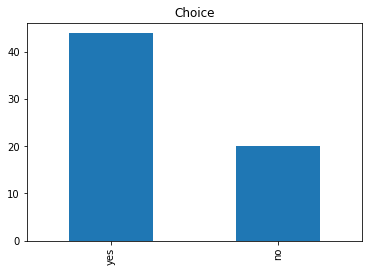

In [7]:
answers_df['answer'].value_counts().plot(kind='bar')
plt.title('Choice')

Text(0.5, 1.0, 'Location')

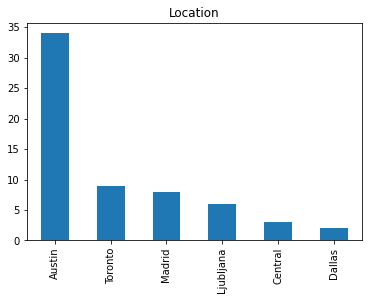

In [10]:
answers_df['city'].value_counts().plot(kind='bar')
plt.title('Location')

Text(0.5, 1.0, &#39;Internet Service Provider&#39;)

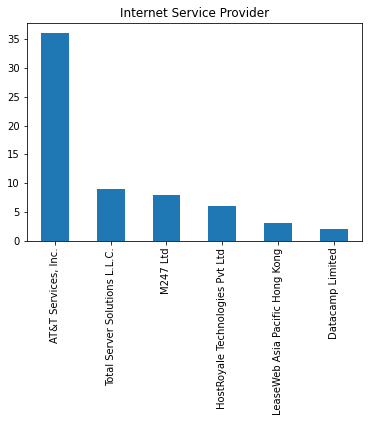

In [8]:
answers_df['isp'].value_counts().plot(kind='bar')
plt.title('Internet Service Provider')

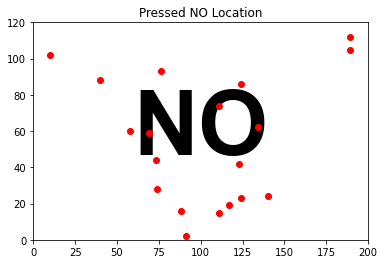

In [50]:
#plot the button press locations
fig, ax = plt.subplots()
ax.scatter(no_answers_df['x'], no_answers_df['y'], color = 'red', zorder=2)
if last_answer_df['answer'] == 'no':
    ax.scatter(last_answer_df['x'],last_answer_df['y'],color='blue', zorder = 3)
ax.set_xlim(0,200)
ax.set_ylim(0,120)
ax.set_title('Pressed NO Location')
ax.text(100, 60, 'NO', horizontalalignment='center', verticalalignment='center', fontname="Arial", fontsize = 90, fontweight = 550, zorder = 1)
plt.show()

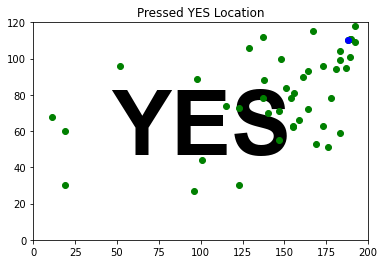

In [9]:
fig, ax = plt.subplots()
ax.scatter(yes_answers_df['x'],yes_answers_df['y'], color = 'green', zorder = 2)
if last_answer_df['answer'] == 'yes':
    ax.scatter(last_answer_df['x'],last_answer_df['y'],color='blue', zorder = 3)
ax.set_xlim(0,200)
ax.set_ylim(0,120)
ax.set_title('Pressed YES Location')
ax.text(100, 60, 'YES', horizontalalignment='center', verticalalignment='center', fontname="Arial", fontsize = 90, fontweight = 550, zorder = 1)
plt.show()

Location Mapping